In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df['gender']=df['gender'].map({'Female':0,'Male':1})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Text(0.5, 1.0, 'Correlation heatmap of numerical features')

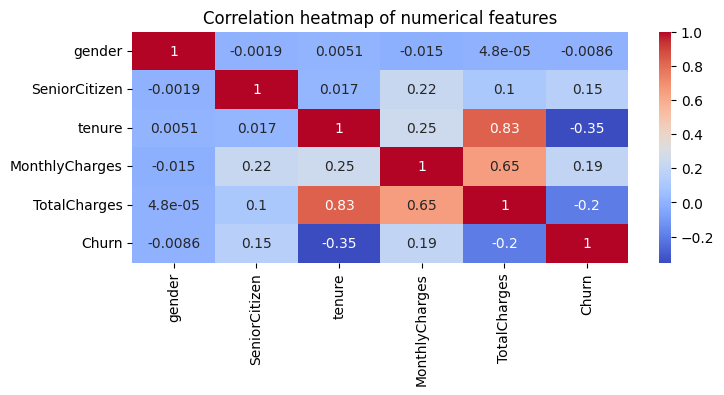

In [ ]:
numerical_features = df.select_dtypes(['float64','int64']).columns
plt.figure(figsize=(8,3))
correlation = df[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap of numerical features")

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
numerical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
  if df[col].dtype == 'object':
    df[col] = pd.factorize(df[col])[0]

numerical_features = [f for f in numerical_features if f in df.columns]

X = df[numerical_features]
y = df['Churn']


rf = RandomForestClassifier(n_estimators=150, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(n_estimators=150, random_state=42),
    n_features_to_select=5)

In [ ]:
selected_features = [feature for feature, selected in
                     zip(numerical_features, rfe.support_) if selected==True]
print(selected_features)

['tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges', 'TotalCharges']


             feature  importance
18      TotalCharges    0.190782
17    MonthlyCharges    0.179227
4             tenure    0.158691
14          Contract    0.078844
16     PaymentMethod    0.056090
8     OnlineSecurity    0.043963
11       TechSupport    0.039347
0             gender    0.027725
15  PaperlessBilling    0.025318
7    InternetService    0.024187
9       OnlineBackup    0.024036
10  DeviceProtection    0.023498
2            Partner    0.022857
6      MultipleLines    0.022128
1      SeniorCitizen    0.020873
13   StreamingMovies    0.019806
3         Dependents    0.019439
12       StreamingTV    0.018834
5       PhoneService    0.004354


Text(0.5, 1.0, 'Feature importances')

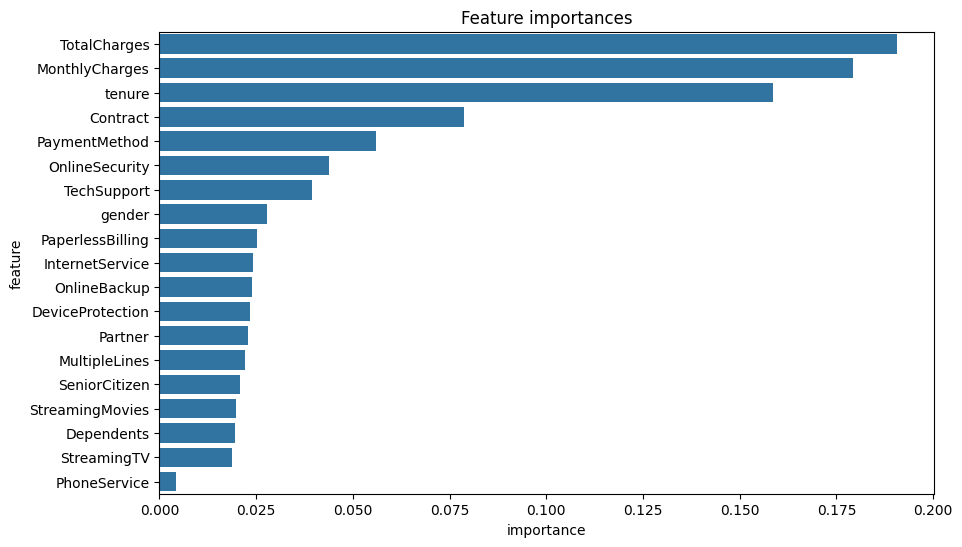

In [ ]:
rf.fit(X,y)
importances = pd.DataFrame({"feature":numerical_features,
                            "importance":rf.feature_importances_})

importances = importances.sort_values('importance', ascending=False)
print(importances)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature',data=importances)
plt.title("Feature importances")

In [ ]:
X = df[selected_features]
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import pickle

In [ ]:
with open('scaler.pkl', "wb") as f:
  pickle.dump(scaler, f)

In [ ]:
def create_model(hp=None):
  if hp:
    model = models.Sequential()
    model.add(layers.Dense(
        units =hp.Choice('units_1',values=[32,64,128]),
        activation = 'relu',
        input_shape = (X_train_scaled.shape[1],)
    ))

    if hp.Boolean('second_layer'):
      model.add(layers.Dense(
          units=hp.Choice('units_2',values=[16,32]),
          activation='relu'
      ))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
  else:
    model = models.Sequential([
        layers.Dense(64, activation='relu',input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
  return model

In [ ]:
initial_model = create_model()
initial_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = initial_model.fit(X_train_scaled, y_train,
                            epochs=50,
                            batch_size=32,
                            validation_split=0.20)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7485 - loss: 0.5025 - val_accuracy: 0.7893 - val_loss: 0.4330
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7848 - loss: 0.4459 - val_accuracy: 0.7884 - val_loss: 0.4252
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7924 - loss: 0.4301 - val_accuracy: 0.7813 - val_loss: 0.4223
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7882 - loss: 0.4330 - val_accuracy: 0.8107 - val_loss: 0.4096
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8034 - loss: 0.4230 - val_accuracy: 0.8053 - val_loss: 0.4079
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.4285 - val_accuracy: 0.8018 - val_loss: 0.4074
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8064 - loss: 0.4102 - val_accuracy: 0.7991 - val_loss: 0.4106
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8053 - loss: 0.4144 - val_accuracy: 0.

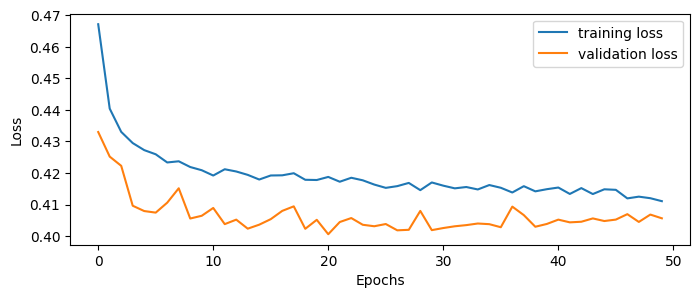

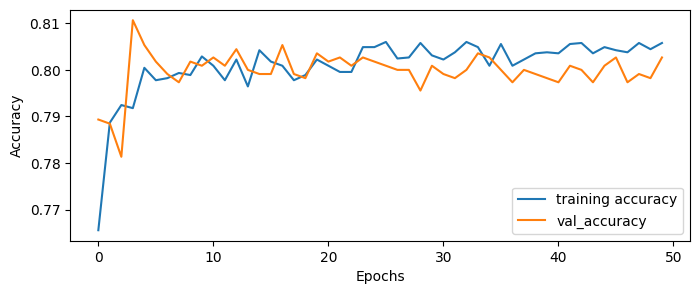

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
loss, accuracy = initial_model.evaluate(X_test_scaled, y_test)
print(f"Initial model Loss : {loss}")
print(f"Initial model Accuracy : {accuracy}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7845 - loss: 0.4388
Initial model Loss : 0.44875332713127136
Initial model Accuracy : 0.7867803573608398


In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=5,
    directory = 'keras_tuning',
    project_name = "churn_prediction"
)
import tensorflow as tf

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)

In [ ]:
tuner.search(
    X_train_scaled, y_train,
    epochs=20,
    validation_split=0.20,
    callbacks=[stop_early]
)

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.8106666803359985

Best val_accuracy So Far: 0.8115555644035339
Total elapsed time: 00h 00m 57s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)
for param in best_hps.values:
  print(f"{param} : {best_hps.get(param)}")

units_1 : 32
second_layer : False


In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_history = best_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.20
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7511 - loss: 0.5763 - val_accuracy: 0.7947 - val_loss: 0.4635
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7841 - loss: 0.4665 - val_accuracy: 0.7964 - val_loss: 0.4415
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7783 - loss: 0.4507 - val_accuracy: 0.7973 - val_loss: 0.4314
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7865 - loss: 0.4422 - val_accuracy: 0.7991 - val_loss: 0.4250
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7795 - loss: 0.4381 - val_accuracy: 0.8000 - val_loss: 0.4203
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4215 - val_accuracy: 0.8018 - val_loss: 0.4189
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7840 - loss: 0.4415 - val_accuracy: 0.8053 - val_loss: 0.4145
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7857 - loss: 0.4358 - val_accuracy: 0.

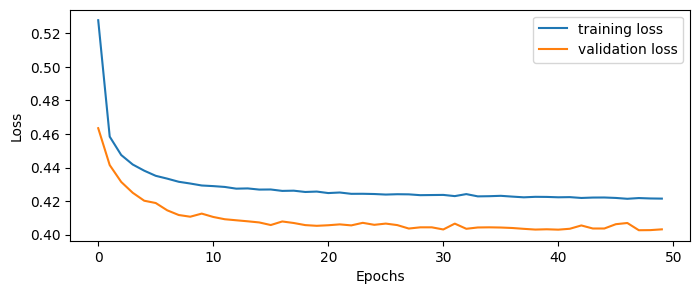

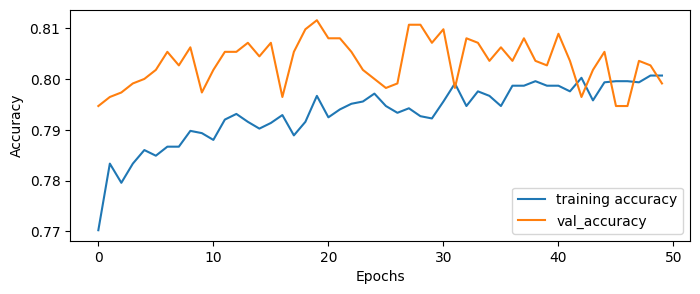

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(best_history.history['loss'],label='training loss')
plt.plot(best_history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.figure(figsize=(8,3))
plt.plot(best_history.history['accuracy'],label='training accuracy')
plt.plot(best_history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
best_loss, best_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Best model Loss : {best_loss}")
print(f"Best model Accuracy : {best_accuracy}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - loss: 0.4317
Best model Loss : 0.43861645460128784
Best model Accuracy : 0.7867803573608398


In [ ]:
best_model.save('best_churn_model.h5')
with open("selected_features.pkl","wb") as f:
  pickle.dump(selected_features, f)

In [ ]:
def load_model_components():
  model = tf.keras.models.load_model('best_churn_model.h5')
  with open('scaler.pkl', "rb") as f:
    scaler = pickle.load(f)
  with open('selected_features.pkl', "rb") as f:
    selected_features = pickle.load(f)

  return model, scaler, selected_features

In [ ]:
def predict_churn(*args):
  model, scaler, selected_features = load_model_components()
  input_data = pd.DataFrame([args], columns=selected_features)
  input_scaled = scaler.transform(input_data)
  prediction = model.predict(input_scaled)[0][0]
  print(f"prediction : {prediction}")
  probability = float(prediction)
  churn_status = "Yes" if probability > 0.50 else "No"

  return {
      "Churn Probability":probability,
      "Will Customer Churn":churn_status
  }

In [ ]:
predict_churn(34, 1, 1, 56.96, 1900)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
prediction : 0.050058700144290924


{'Churn Probability': 0.050058700144290924, 'Will Customer Churn': 'No'}